In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('HDFCBANK.csv')

In [3]:
df=data.copy()

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,3.030,3.030,2.925,2.980,0.595425,350000.0
1,1996-01-02,2.980,3.025,2.950,2.975,0.594426,412000.0
2,1996-01-03,2.975,2.995,2.950,2.985,0.596424,284000.0
3,1996-01-04,2.985,2.980,2.940,2.965,0.592428,282000.0
4,1996-01-05,2.965,2.980,2.950,2.960,0.591429,189000.0


In [5]:
df.shape

(6229, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6102.000000,6102.000000,6102.000000,6102.000000,6102.000000,6.102000e+03
mean,280.876740,283.718757,277.699139,280.784199,262.166892,4.844925e+06
std,348.668891,351.470448,345.381472,348.430553,351.118302,5.752826e+06
min,2.435000,2.450000,2.395000,2.435000,0.486530,0.000000e+00
25%,23.590000,23.981250,23.126250,23.520000,9.233752,1.567042e+06
50%,116.000000,119.244999,113.962502,116.799999,82.996315,3.299666e+06
75%,410.987503,415.281250,406.912498,410.612503,389.092781,6.137584e+06
max,1305.000000,1305.500000,1288.800049,1302.400024,1302.400024,2.011300e+08


In [7]:
df=df.dropna()


In [8]:
df.shape
df.head()
df = df.reset_index(drop=True)


In [9]:
change = np.array([])

for i in range(1,6102):
    see=((df.iloc[i]["Close"]-df.iloc[i-1]["Close"])/df.iloc[i-1]["Close"])*100
    change=np.append(change,see)
change=np.insert(change,0,-100)
print(change)
df["change"]=change.copy()

df.drop(0,inplace=True)
df = df.reset_index(drop=True)

[-100.           -0.16778523    0.33613445 ...   -0.54263119   -1.09119476
   -1.91907222]


In [10]:
df.shape

(6101, 8)

In [11]:
win=0
lose=0
target=0
winp=0
losep=0
if(df.iloc[0]["change"]>0):
    target=1
else:
    target=0
arr=[]
count=0
for i in range(1,6101):
    count=count+1
    if(count==251):
        see=[winp,losep]
        arr.append(see)
        count=0
        winp=0
        losep=0
    if(target==0):
        if(df.iloc[i]["change"]>0):
            target=1
    else:
        if(df.iloc[i]["change"]>0):
            win=win+1
            winp=winp+df.iloc[i]["change"]
            target=1
        else:
            lose=lose+1
            losep=losep+df.iloc[i]["change"]
            target=0
print("Number of days you won: ",win)
print("Number of days you lose: ",lose)
print("Won amount: ",winp)
print("Loss amount: ",losep)
print(arr)
for i in arr:
    print(i[0]+i[1])

Number of days you won:  1551
Number of days you lose:  1504
Won amount:  28.85786798755062
Loss amount:  -24.30772611826567
[[133.43137587461462, -75.192065831726], [137.19028934088587, -87.56231618870117], [129.11361200711147, -152.61703577730106], [266.0553753007703, -147.3214438813562], [106.13332775949156, -93.26544024452693], [97.24558448492249, -90.77355875643667], [69.12378652665085, -67.65308184507876], [112.78976928375428, -87.65763813223731], [99.85861852071966, -63.76929618785731], [108.61306296810172, -68.73096015694699], [116.35177859306579, -84.76695326156025], [116.83808595143547, -102.41738045080976], [193.9307969857479, -179.59004992305168], [335.39561391567935, -173.3606958544241], [81.45128641799187, -66.87555607671767], [93.0765627233236, -63.81521012665046], [64.81137665834825, -54.488693610513], [92.53620242079816, -89.34694375803412], [75.13104088218965, -57.719036296356045], [43.487979808920535, -51.89492551479451], [59.01867690975138, -39.66817946256582], [48.

In [12]:
win=0
lose=0
winp=0
losep=0
arr=[]
count=0
for i in range(0,6100):
    count=count+1
    if(count==251):
        arr.append([winp,losep])
        winp=0
        losep=0
        count=0
    if(df.iloc[i]["change"]>0):
        win=win+1
        winp=winp+df.iloc[i]["change"]
    else:
        lose=lose+1
        losep=losep+df.iloc[i]["change"]
for i in arr:
    print(i[0]+i[1])
    

40.476844116280546
64.58474987006011
-12.613903203994425
150.67284278159337
26.439193470100918
-3.524434549284564
4.014256745899459
45.30374585558724
57.3523832132434
30.569396307742664
47.94191670482482
32.13195966665043
-33.096082204048855
174.81320090208197
22.22518112328484
19.885140814525414
19.37084906203137
21.923102386303015
34.99066351631859
10.484472313603675
33.55317719315734
26.45982205005825
15.24709379114573
-16.171187173865917


In [12]:
import matplotlib.pyplot as plt

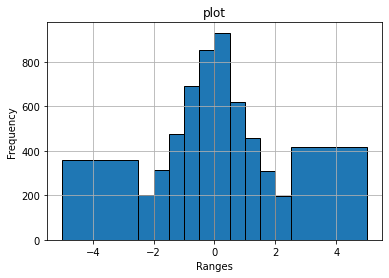

In [13]:
x=np.array(df["change"])

plt.hist(x, bins=[-5,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,5], edgecolor="black") 
plt.ylabel("Frequency")
plt.xlabel("Ranges")
plt.grid()
plt.title("plot")
plt.show()

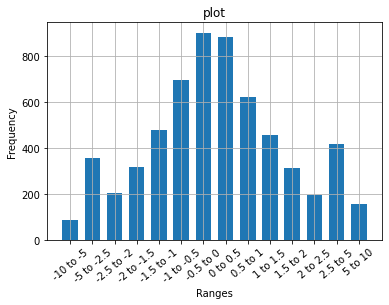

In [14]:
freq={}
freq["-10 to -5"]=0
freq["-5 to -2.5"]=0
freq["-2.5 to -2"]=0
freq["-2 to -1.5"]=0
freq["-1.5 to -1"]=0
freq["-1 to -0.5"]=0
freq["-0.5 to 0"]=0
freq["0 to 0.5"]=0
freq["0.5 to 1"]=0
freq["1 to 1.5"]=0
freq["1.5 to 2"]=0
freq["2 to 2.5"]=0
freq["2.5 to 5"]=0
freq["5 to 10"]=0

x=np.array(df["change"])
for ele in x:
    if(-10<=ele and ele<=-5):
        freq["-10 to -5"]=freq["-10 to -5"]+1
    elif(-5<=ele and ele<=-2.5):
        freq["-5 to -2.5"]=freq["-5 to -2.5"]+1
    elif(-2.5<=ele and ele<=-2):
        freq["-2.5 to -2"]=freq["-2.5 to -2"]+1
    elif(-2<=ele and ele<=-1.5):
        freq["-2 to -1.5"]=freq["-2 to -1.5"]+1
    elif(-1.5<=ele and ele<=-1):
        freq["-1.5 to -1"]=freq["-1.5 to -1"]+1
    elif(-1<=ele and ele<=-0.5):
        freq["-1 to -0.5"]=freq["-1 to -0.5"]+1
    elif(-0.5<=ele and ele<=0):
        freq["-0.5 to 0"]=freq["-0.5 to 0"]+1
    elif(0<=ele and ele<=0.5):
        freq["0 to 0.5"]=freq["0 to 0.5"]+1
    elif(0.5<=ele and ele<=1):
        freq["0.5 to 1"]=freq["0.5 to 1"]+1
    elif(1<=ele and ele<=1.5):
        freq["1 to 1.5"]=freq["1 to 1.5"]+1
    elif(1.5<=ele and ele<=2):
        freq["1.5 to 2"]=freq["1.5 to 2"]+1
    elif(2<=ele and ele<=2.5):
        freq["2 to 2.5"]=freq["2 to 2.5"]+1
    elif(2.5<=ele and ele<=5):
        freq["2.5 to 5"]=freq["2.5 to 5"]+1
    elif(5<=ele and ele<=10):
        freq["5 to 10"]=freq["5 to 10"]+1
    
frequency=[freq["-10 to -5"],freq["-5 to -2.5"],freq["-2.5 to -2"],freq["-2 to -1.5"],freq["-1.5 to -1"],freq["-1 to -0.5"],freq["-0.5 to 0"],
           freq["0 to 0.5"],freq["0.5 to 1"],freq["1 to 1.5"],freq["1.5 to 2"],freq["2 to 2.5"],freq["2.5 to 5"],freq["5 to 10"]]
rangess=["-10 to -5","-5 to -2.5","-2.5 to -2","-2 to -1.5","-1.5 to -1","-1 to -0.5","-0.5 to 0","0 to 0.5","0.5 to 1","1 to 1.5",
      "1.5 to 2","2 to 2.5","2.5 to 5","5 to 10"]
plt.bar(rangess,frequency,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Frequency")
plt.xlabel("Ranges")
plt.grid()
plt.title("plot")
plt.show()




In [15]:
posDays=0
negDays=0
pos=0
neg=0
zero=0
for ele in x:
    if(ele>0):
        pos=pos+ele
        posDays=posDays+1
    elif(ele<0):
        neg=neg+ele
        negDays=negDays+1
    else:
        zero=zero+1
print("No of days market was positive: ",posDays)
print("Total pos sum: ",pos)
print("No of days market was negative: ",negDays)
print("Total neg sum: ",neg)
print("Number of days market did not moved: ",zero)

No of days market was positive:  3055
Total pos sum:  5056.214317118498
No of days market was negative:  2996
Total neg sum:  -4226.020164085232
Number of days market did not moved:  50


In [19]:
import datetime as dt
posDays=0
negDays=0
pos=0
neg=0
zero=0

monday={}
tuesday={}
wednesday={}
thursday={}
friday={}
for i in range(0,6101):
    year=df.iloc[i]["Date"][0]+df.iloc[i]["Date"][1]+df.iloc[i]["Date"][2]+df.iloc[i]["Date"][3]
    month=df.iloc[i]["Date"][5]+df.iloc[i]["Date"][6]
    day=df.iloc[i]["Date"][8]+df.iloc[i]["Date"][9]
    year=int(year)
    month=int(month)
    day=int(day)
    x_date = dt.date(year, month, day)
    no = x_date.weekday()
    if(no==0):
        ele=df.iloc[i]["change"]
        if year in monday:
            monday[year]=monday[year]+ele
        else:
            monday[year]=ele
    elif(no==1):
        ele=df.iloc[i]["change"]
        if year in tuesday:
            tuesday[year]=tuesday[year]+ele
        else:
            tuesday[year]=ele
    elif(no==2):
        ele=df.iloc[i]["change"]
        if year in wednesday:
            wednesday[year]=wednesday[year]+ele
        else:
            wednesday[year]=ele    
    elif(no==3):
        ele=df.iloc[i]["change"]
        if year in thursday:
            thursday[year]=thursday[year]+ele
        else:
            thursday[year]=ele
    elif(no==4):
        ele=df.iloc[i]["change"]
        if year in friday:
            friday[year]=friday[year]+ele
        else:
            friday[year]=ele
    

sum=0
print(monday)
for key,value in monday.items():
    sum=sum+value

a=sum
sum=0
for key,value in tuesday.items():
    sum=sum+value
b=sum
sum=0
for key,value in wednesday.items():
    sum=sum+value

c=sum
sum=0
for key,value in thursday.items():
    sum=sum+value
d=sum
sum=0
for key,value in friday.items():
    sum=sum+value
e=sum



{1996: -15.241977691327829, 1997: -1.8100409306010887, 1998: -8.721307544023988, 1999: -21.327444893606945, 2000: 9.669370224825762, 2001: -21.69886802265514, 2002: 11.046940201684174, 2003: 12.316197564305632, 2004: -10.570533344275006, 2005: 20.086207619161165, 2006: -12.518601372738836, 2007: 7.33149337116124, 2008: -15.94758821193279, 2009: -30.767085062727173, 2010: 19.084457047876256, 2011: -2.444304900759349, 2012: -11.276017040504495, 2013: 1.8903369417822353, 2014: 18.928547333094034, 2015: -5.041805746145794, 2016: -2.358106725074109, 2017: 14.167073082586736, 2018: 1.3726086404663518, 2019: 4.567234475630281, 2020: -56.74981876959865}


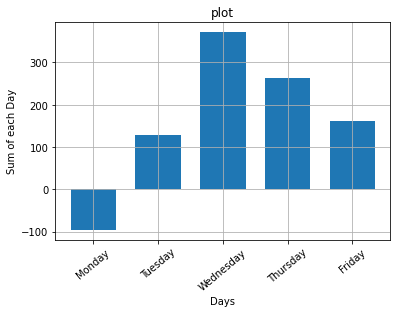

In [20]:
Sum_day=[a,b,c,d,e]
Days=["Monday","Tuesday","Wednesday","Thursday","Friday"]
plt.bar(Days,Sum_day,width=0.7)
plt.xticks(rotation=40)
plt.ylabel("Sum of each Day")
plt.xlabel("Days")
plt.grid()
plt.title("plot")
plt.show()